In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from utils import calc_performance, plot_confusion_matrix, calc_test_train_performance

In [2]:
raw_df = pd.read_csv('../data/processed/completeddata.csv',index_col=0)

In [3]:
train = raw_df[raw_df.Year <= 2016]
test = raw_df[raw_df.Year > 2016]

In [4]:
FEAT_SET = ['ValueOfProduction', 'MaximumColonies', 'LostColonies', 'AddedColonies', 'Pesticides', 'OtherDiseases', 'UnknownDiseases', 'Tavg', 'Prcp', 'Awnd']
TARGET = 'YieldClass'

In [5]:
X_train = train[FEAT_SET]
y_train = train[TARGET]

X_test = test[FEAT_SET]
y_test = test[TARGET]

In [6]:
param_grid = {'max_features':np.arange(1,7),
              'min_samples_leaf': [int(i) for i in np.linspace(3,X_train.shape[0],5)],
              'n_estimators':[500],
              'max_depth':np.arange(5,10)}
estimator = RandomForestClassifier()

In [7]:
gs = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, refit=True)

In [8]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  4.4min finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([1, 2, 3, 4, 5, 6]), 'min_samples_leaf': [3, 22, 42, 62, 82], 'n_estimators': [500], 'max_depth': array([5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [9]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 500}
0.5853658536585366


In [10]:
model = gs.best_estimator_

In [11]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

#### Model Performance

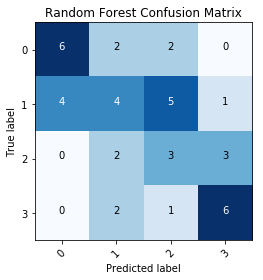

In [12]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=[0,1,2,3], title='Random Forest Confusion Matrix')

In [13]:
calc_test_train_performance(model, X_train, X_test, y_train, y_test)

,Train_Score,Test_Score
cross_entropy,0.520716,1.225708
accuracy,0.975610,0.463415


### Reducing Features Further based on Feature Importances

In [14]:
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [[feature, round(importance, 2)] for feature, importance in zip(X_test.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [15]:
X_train_important = X_train.loc[:,[feature_importances[0][0],feature_importances[1][0]]]
X_test_important = X_test.loc[:,[feature_importances[0][0],feature_importances[1][0]]]

In [16]:
param_grid = {'min_samples_leaf': [int(i) for i in np.linspace(4,X_train.shape[0],5)],
              'n_estimators':[500],
              'max_depth':np.arange(5,10)}
estimator = RandomForestClassifier()
gs = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, refit=True)

In [17]:
gs.fit(X_train_important, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   39.5s finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [4, 23, 43, 62, 82], 'n_estimators': [500], 'max_depth': array([5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [18]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 500}
0.5975609756097561


In [19]:
model = gs.best_estimator_

In [20]:
y_pred = model.predict(X_test_important)
y_proba = model.predict_proba(X_test_important)

#### Model Performance on Reduced Features

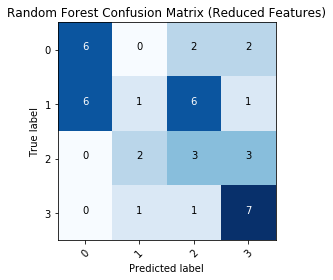

In [23]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=[0,1,2,3], title='Random Forest Confusion Matrix (Reduced Features)')

In [22]:
calc_test_train_performance(model, X_train_important, X_test_important, y_train, y_test)

,Train_Score,Test_Score
cross_entropy,0.752166,1.255691
accuracy,0.719512,0.414634
